# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

653

### Perform API Calls


In [3]:
city_df = pd.DataFrame(cities)
city_df = city_df.rename(columns={0: "City"})
city_df[['Lat', 'Lng', "Country", "Max Temp", 
                        "Humidity", "Cloudiness", "Wind Speed", "Date"]]=""

url = 'https://api.openweathermap.org/data/2.5/weather?'
params = {'appid': weather_api_key, "units": "imperial"}

response = requests.get(url, params).json()
response

print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in city_df.iterrows():
    city = row['City']
    params['q'] = city
    print(f"Processing Record {index}: | {city}")
    try:
        response = requests.get(url, params).json()
        row['Lat'] = response['coord']['lat']
        row['Lng'] = response['coord']['lon']
        row['Country']=response['sys']['country']
        row['Max Temp']=response['main']['temp_max']
        row['Humidity']=response['main']['humidity']
        row['Cloudiness']=response['clouds']['all']
        row['Wind Speed']=response['wind']['speed']
        row['Date']=response['dt']
                   
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 0: | wahran
City not found. Skipping...
Processing Record 1: | manggar
Processing Record 2: | muros
Processing Record 3: | castro
Processing Record 4: | dolbeau
City not found. Skipping...
Processing Record 5: | sayyan
Processing Record 6: | puerto ayora
Processing Record 7: | albany
Processing Record 8: | pangnirtung
Processing Record 9: | yellowknife
Processing Record 10: | abha
Processing Record 11: | attawapiskat
City not found. Skipping...
Processing Record 12: | mahebourg
Processing Record 13: | kirakira
Processing Record 14: | sibolga
Processing Record 15: | bluff
Processing Record 16: | zolotinka
City not found. Skipping...
Processing Record 17: | punta arenas
Processing Record 18: | klaksvik
Processing Record 19: | rikitea
Processing Record 20: | humberto de campos
Processing Record 21: | beihai
Processing Record 22: | butaritari
Processing Record 23: | soyo
Processing Record 24: | portland
Processing Rec

Processing Record 223: | comodoro rivadavia
Processing Record 224: | rorvik
Processing Record 225: | sao joao da barra
Processing Record 226: | grand river south east
City not found. Skipping...
Processing Record 227: | richards bay
Processing Record 228: | jacqueville
Processing Record 229: | uberlandia
Processing Record 230: | ridgecrest
Processing Record 231: | boguchany
Processing Record 232: | praya
Processing Record 233: | traverse city
Processing Record 234: | harper
Processing Record 235: | erzin
Processing Record 236: | gogrial
Processing Record 237: | kruisfontein
Processing Record 238: | normandin
Processing Record 239: | ketchikan
Processing Record 240: | talnakh
Processing Record 241: | kifri
Processing Record 242: | allapalli
Processing Record 243: | lamu
Processing Record 244: | kloulklubed
Processing Record 245: | carupano
Processing Record 246: | beringovskiy
Processing Record 247: | guanare
Processing Record 248: | cumberland
Processing Record 249: | cancun
Processing

Processing Record 448: | kilindoni
Processing Record 449: | hambantota
Processing Record 450: | timra
Processing Record 451: | burica
City not found. Skipping...
Processing Record 452: | athens
Processing Record 453: | novoagansk
Processing Record 454: | tornio
Processing Record 455: | minsk
Processing Record 456: | pisco
Processing Record 457: | emba
Processing Record 458: | alyangula
Processing Record 459: | bermeo
Processing Record 460: | altay
Processing Record 461: | arvika
Processing Record 462: | ulaanbaatar
Processing Record 463: | ocampo
Processing Record 464: | sao filipe
Processing Record 465: | leshukonskoye
Processing Record 466: | novo aripuana
Processing Record 467: | muzhi
Processing Record 468: | valparaiso
Processing Record 469: | lethem
Processing Record 470: | ruatoria
City not found. Skipping...
Processing Record 471: | komsomolskiy
Processing Record 472: | lewiston
Processing Record 473: | tongren
Processing Record 474: | banda aceh
Processing Record 475: | gutier

### Convert Raw Data to DataFrame

In [4]:
city_df = city_df.dropna()

city_df.to_csv(output_data_file)
city_df.head()

,City,Lat,Lng,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,wahran,,,,,,,,
1,manggar,-2.8833,108.2667,ID,82.09,69,54,4.54,1649862207
2,muros,42.7762,-9.0603,ES,65.68,82,15,11.27,1649862208
3,castro,-24.7911,-50.0119,BR,68.52,90,100,7.14,1649862208
4,dolbeau,,,,,,,,


In [5]:
city_df['Humidity'] = pd.to_numeric(city_df['Humidity'])
city_df['Lat'] = pd.to_numeric(city_df['Lat'])
city_df['Lng'] = pd.to_numeric(city_df['Lng'])
city_df['Max Temp'] = pd.to_numeric(city_df['Max Temp'])
city_df['Cloudiness'] = pd.to_numeric(city_df['Cloudiness'])
city_df['Wind Speed'] = pd.to_numeric(city_df['Wind Speed'])
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,19.720249,20.946588,61.014262,69.471477,61.159396,8.728473
std,33.453715,90.170285,23.931417,23.461483,38.988855,5.743113
min,-54.800000,-175.200000,-18.780000,1.000000,0.000000,0.000000
25%,-7.608050,-58.625075,44.455000,57.000000,20.000000,4.140000
50%,22.584400,23.336750,66.220000,75.500000,75.000000,7.400000
75%,47.716625,100.235350,78.870000,86.250000,100.000000,12.112500
max,78.218600,179.316700,106.930000,100.000000,100.000000,33.870000


## Inspect the data and remove the cities where the humidity > 100%.

In [6]:
print(f"Starting no. of cities: {len(city_df)}")
clean_city_df = city_df[city_df["Humidity"] <= 100]
print(f"No. of cities with humidity <=100: {len(clean_city_df)}")
clean_city_df.head()

Starting no. of cities: 653
No. of cities with humidity <=100: 596


,City,Lat,Lng,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,manggar,-2.8833,108.2667,ID,82.09,69.0,54.0,4.54,1649862207
2,muros,42.7762,-9.0603,ES,65.68,82.0,15.0,11.27,1649862208
3,castro,-24.7911,-50.0119,BR,68.52,90.0,100.0,7.14,1649862208
5,sayyan,15.1718,44.3244,YE,72.39,20.0,45.0,9.13,1649862208
6,puerto ayora,-0.7393,-90.3518,EC,80.56,80.0,61.0,7.25,1649862209


## Plotting the Data

In the following images, each dot represents a randomly selected city, plotted horizontally according to its latitudinal coordinates

## Latitude vs. Temperature Plot

Here, the vertical axis represents the current maximum temperature of each city. As you can see, cities close to the equator (0 latitude) have higher average temperatures than cities closer to the poles.

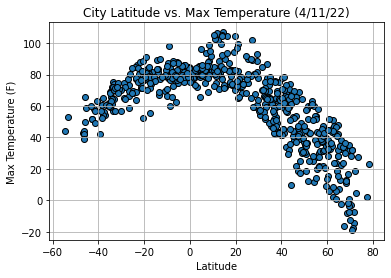

In [7]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Max Temp'], edgecolors='black')
plt.title("City Latitude vs. Max Temperature (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('output_images/LatVTemp.png')
plt.show()

## Latitude vs. Humidity Plot

Here, the vertical axis represents humidity. The trend in this case is less pronounced - while most latitudes have the capacity for high humidity, the 'v' shaped pattern visable here shows that while very few cities with low humidity are found closer to the poles, a good number can be found near the equator. 

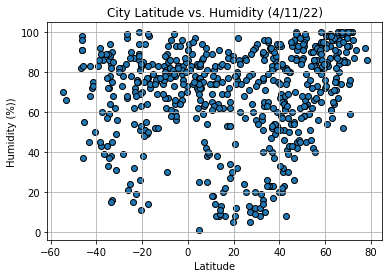

In [8]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Humidity'], edgecolors='black')
plt.title("City Latitude vs. Humidity (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid()
plt.savefig('output_images/LatVHum.png')
plt.show()


## Latitude vs. Cloudiness Plot

Here, the vertical axis represents cloudiness. No clear trend is visible from this data, indicating that cloudiness is largely independent of latitude. One thing of note is that there are no cities with 0 percent cloud cover close to the equator. 

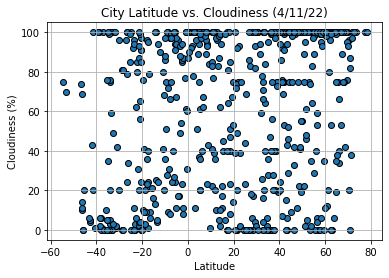

In [9]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Cloudiness'], edgecolors='black')
plt.title("City Latitude vs. Cloudiness (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_images/LatVCloud.png')
plt.show()


## Latitude vs. Wind Speed Plot
Here, the vertical axis represents current wind speed in each city. There does not appear to be a clear correlation with latitude. Noted is that the large majority of cities have wind speeds of less than 20 mph, and the cities with the highest windspeed appear to be clustered around 40 degrees latitude.

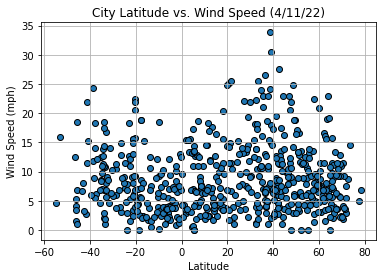

In [10]:
plt.scatter(clean_city_df['Lat'], clean_city_df['Wind Speed'], edgecolors='black')
plt.title("City Latitude vs. Wind Speed (4/11/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('output_images/LatVWind.png')
plt.show()


## Linear Regression

The following code attempts to describe visible data trends by performing linear regression models

In [11]:
north_city_df = clean_city_df[clean_city_df['Lat'] >= 0]
south_city_df = clean_city_df[clean_city_df['Lat'] < 0]

### Max Temp vs. Latitude Linear Regression
The following code demonstrates a relationship between latitude and max temp, such that cities close to the equator (0 degrees latitude) have higher temperatures than cities farther away. This is true for either hemisphere, however the regression model is particularly strong for the Northern hemisphere (northern r-value = -0.85, southern r-value = 0.75)

####  Northern Hemisphere

The r-value is -0.850536050517176


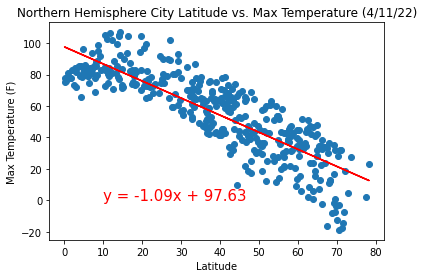

In [12]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Max Temp'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Max Temp'])
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (4/11/22)")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.savefig('output_images/NorthLatVTemp.png')
plt.show()


####  Southern Hemisphere

The r-value is 0.7521319396391936


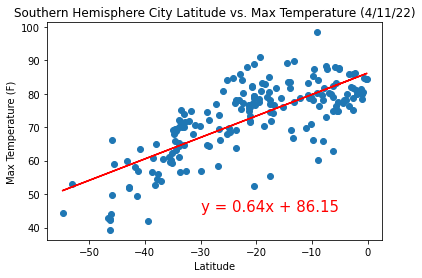

In [13]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Max Temp'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Max Temp'])
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (4/11/22)")
plt.annotate(line_eq,(-30,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.savefig('output_images/SouthLatVTemp.png')
plt.show()


### Humidity (%) vs. Latitude Linear Regression

Linear regression models performed below observe the possibility of a trend between latitude and humidity. Cities of higher % humidity tend to be farther from the equator for the northern hemisphere, however the regression shows only a weak relationship here (r = 0.3). For the southern hemisphere, the trend is actually reversed, although with a very weak correlation (r = 0.15).

####  Northern Hemisphere

The r-value is 0.3239182064512601


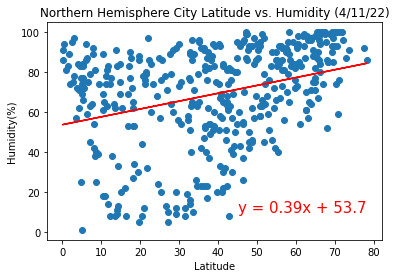

In [14]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Humidity'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Humidity'])
plt.title("Northern Hemisphere City Latitude vs. Humidity (4/11/22)")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.savefig('output_images/NorthLatVHumid.png')
plt.show()


####  Southern Hemisphere

The r-value is 0.15323466129400973


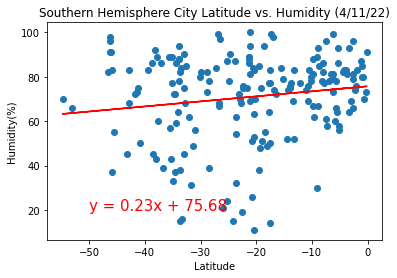

In [15]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Humidity'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Humidity'])
plt.title("Southern Hemisphere City Latitude vs. Humidity (4/11/22)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.savefig('output_images/SouthLatVHumid.png')
plt.show()


###  Cloudiness (%) vs. Latitude Linear Regression

For the northern hemisphere, there is no clear relationship between cloudiness and latitude (r = 0.11). For the southern hemisphere, there is a weak relationship (r = 0.28) indicating a slight correlation, with higher cloudiness observed more frequently closer to the equator. 

####  Northern Hemisphere

The r-value is 0.11438329966268387


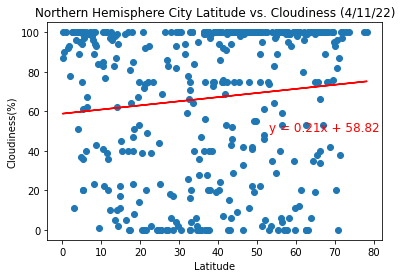

In [16]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Cloudiness'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Cloudiness'])
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (4/11/22)")
plt.annotate(line_eq,(53,50),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.savefig('output_images/NorthLatVCloud.png')
plt.show()


####  Southern Hemisphere

The r-value is 0.28201587567740927


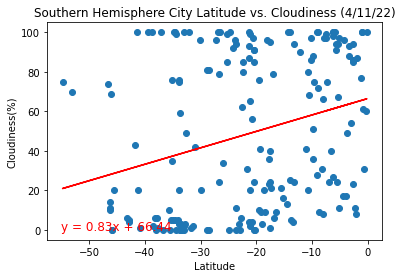

In [17]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Cloudiness'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Cloudiness'])
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (4/11/22)")
plt.annotate(line_eq,(-55,0),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.savefig('output_images/SouthLatVCloud.png')
plt.show()


###  Wind Speed (mph) vs. Latitude Linear Regression

There is no observable relationship between wind speed and latitude for the northern hemisphere (r = -0.04). For the southern hemisphere, there is a weak negative correlation (r=-0.26) indicating that cities farther from the equator tend to have higher wind speeds. 

####  Northern Hemisphere

The r-value is -0.037531801713779546


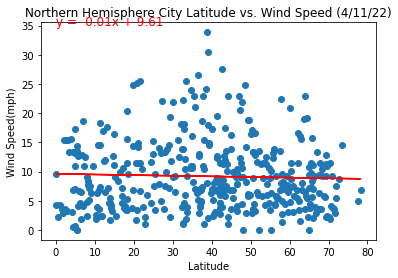

In [18]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(north_city_df['Lat'], north_city_df['Wind Speed'])
# Create equation of line
fit = slope * north_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(north_city_df['Lat'], north_city_df['Wind Speed'])
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (4/11/22)")
plt.annotate(line_eq,(0,35),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.plot(north_city_df['Lat'],fit, 'r')
plt.savefig('output_images/NorthLatVWind.png')
plt.show()


####  Southern Hemisphere

The r-value is -0.26630948105919783


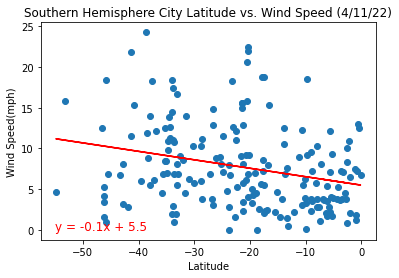

In [19]:
# Perform a linear regression
slope, inte, r, p, std_err = linregress(south_city_df['Lat'], south_city_df['Wind Speed'])
# Create equation of line
fit = slope * south_city_df['Lat'] + inte
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(inte,2))
print(f"The r-value is {r}")
# Plot the linear model on top of scatter plot 
plt.scatter(south_city_df['Lat'], south_city_df['Wind Speed'])
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (4/11/22)")
plt.annotate(line_eq,(-55,0),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.plot(south_city_df['Lat'],fit, 'r')
plt.savefig('output_images/SouthLatVWind.png')
plt.show()
